## DataLoader 활용한 시각화

In [1]:
from data_provider.data_factory import data_provider
from types import SimpleNamespace

configs = SimpleNamespace(
    # Task
    seq_len=336,
    label_len=0,
    pred_len=336,
    enc_in=7,
    dec_in=7,
    c_out=7,
    features='M',
    freq='h',
    
    # Data
    root_path='datasets/ETT-small',
    data='ETTh1',
    data_path='ETTh1.csv',
    target='OT',
    embed='timeF',
    batch_size=32,)

train_data, train_loader = data_provider(configs ,'train')
vali_data, vali_loader = data_provider(configs ,'val')
test_data, test_loader = data_provider(configs ,'test')

train 7969
val 2545
test 2545


In [2]:
import numpy as np
import matplotlib.pyplot as plt

for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(train_loader):

    if i >= 50:
        break
    
    mean = batch_x.mean(dim=1, keepdim=True)
    std = batch_x.std(dim=1, keepdim=True)
    normalized_batch_x = (batch_x-mean)/std
    normalized_batch_y = (batch_y-mean)/std
    
    x = batch_x[0, :, -1].numpy()
    y = batch_y[0, :, -1].numpy()
    
    plt.figure(figsize=(15, 4))
    plt.plot(np.arange(configs.seq_len), x)
    plt.plot(np.arange(configs.seq_len, configs.seq_len+configs.pred_len), y)
    plt.axvline(x=configs.seq_len-1, color='black', linestyle='--')
    plt.savefig(f'visualize/none/{i}.png')
    plt.close()
    
    x = normalized_batch_x[0, :, -1].numpy()
    y = normalized_batch_y[0, :, -1].numpy()
    
    plt.figure(figsize=(15, 4))
    plt.plot(np.arange(configs.seq_len), x)
    plt.plot(np.arange(configs.seq_len, configs.seq_len+configs.pred_len), y)
    plt.axvline(x=configs.seq_len-1, color='black', linestyle='--')
    plt.savefig(f'visualize/revin/{i}.png')
    plt.close()    

## Window 단위 시각화

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

window_size = 720

df = pd.read_csv("/home/Normalizer/Proposed/datasets/ETT-small/ETTh1.csv", index_col=0)
df.index = pd.to_datetime(df.index)
ot = df['OT']

ot_values = ot.values

padded_ot = pd.Series(np.pad(ot_values, (12, 12), mode='edge'))
padded_ma24 = padded_ot.rolling(25, center=True, min_periods=1).mean()
ma24 = padded_ma24.iloc[12:-12].reset_index(drop=True)

padded_ot = pd.Series(np.pad(ot_values, (24, 24), mode='edge'))
padded_ma48 = padded_ot.rolling(49, center=True, min_periods=1).mean()
ma48 = padded_ma48.iloc[24:-24].reset_index(drop=True)

padded_ot = pd.Series(np.pad(ot_values, (48, 48), mode='edge'))
padded_ma96 = padded_ot.rolling(97, center=True, min_periods=1).mean()
ma96 = padded_ma96.iloc[48:-48].reset_index(drop=True)

for i in tqdm(range(0, len(ot)-window_size+1, window_size//2)):
    plt.figure(figsize=(20, 10))
    plt.subplot(2,2,1)
    plt.plot(np.arange(window_size), ot[i:i+window_size], color='black', label='OT')
    plt.plot(np.arange(window_size), ma24[i:i+window_size], label='MA24')
    plt.plot(np.arange(window_size), ma48[i:i+window_size], label='MA48')
    plt.plot(np.arange(window_size), ma96[i:i+window_size], label='MA96')
    plt.legend()
    plt.subplot(2,2,2)
    plt.plot(np.arange(window_size), ma24[i:i+window_size], color='blue', label='MA24')
    plt.legend()
    plt.subplot(2,2,3)
    plt.plot(np.arange(window_size), ma48[i:i+window_size], color='orange', label='MA48')
    plt.legend()
    plt.subplot(2,2,4)
    plt.plot(np.arange(window_size), ma96[i:i+window_size], color='green', label='MA96')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'visualize/window/{i}.png')
    plt.close()

100%|██████████| 47/47 [00:30<00:00,  1.52it/s]


<Axes: xlabel='date'>

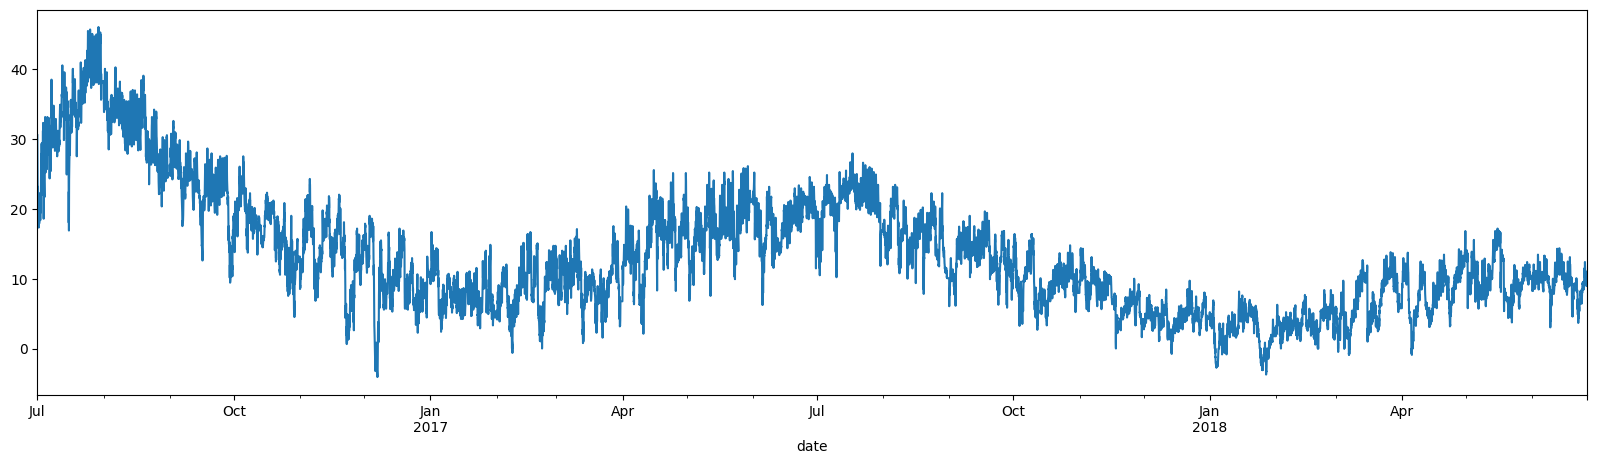

In [41]:
temp = pd.read_csv("/home/Normalizer/Proposed/datasets/ETT-small/ETTh1.csv", index_col=0)
temp.index = pd.to_datetime(temp.index)
temp.OT.plot(figsize=(20, 5))